In [ ]:
import time
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from google.colab import files
import scipy.optimize as opt
plt.rcParams.update({'font.size': 18})

In [ ]:
#alpha and beta float variables generating (0,1)
random.seed(111)
np.random.seed(111)
alpha = random.random()
beta = random.random()
x_k = []
y_k = []
delta_k = []

#x_k array generating
for k in range (101):
    x_k.append(k/100)
x_k = np.array(x_k)
#delta_k array generating
delta_k = np.random.normal(0,1,101)
delta_k = np.array(delta_k)
#y_k array generating
y_k = alpha * x_k + beta + delta_k
y_k = np.array(y_k)

print(alpha, beta)

0.827170565342314 0.21276311517617263


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply


nan nan
[1.00279631 0.11425576]
[1.00279608 0.11425589]
[1.00279624 0.11425581]


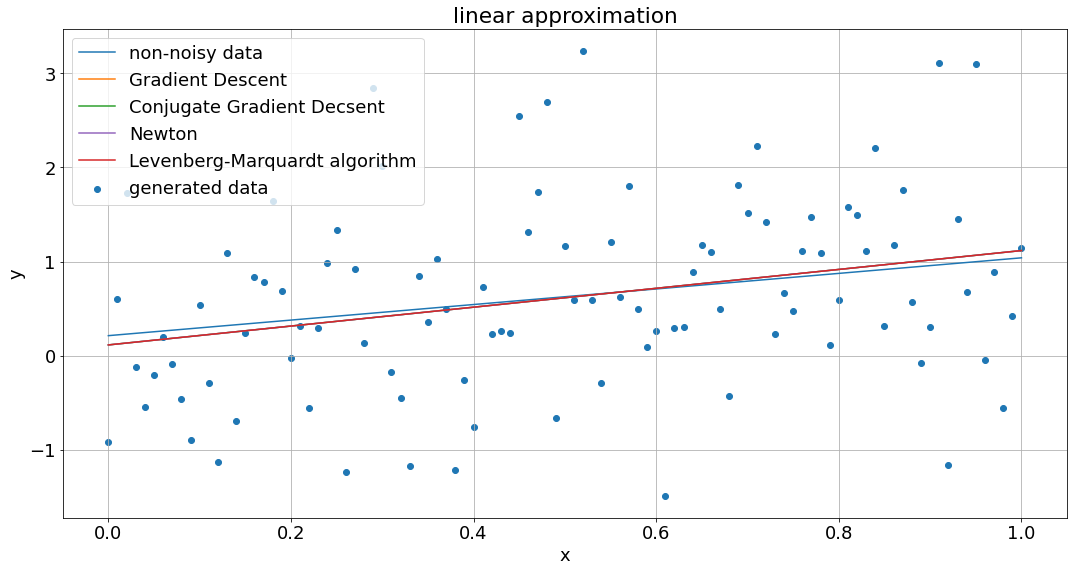

In [39]:
#linear approximation

#functions for optimizations
def linear(x, a, b): #F(x_k, a, b)
    return a * x + b

def least_squares(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global linear
    return np.sum((linear(x_k, a, b) - y_k)**2)

def least_squares_lm(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global linear
    return (linear(x_k, a, b) - y_k)

def grad(params): #D'(a, b)
    a, b = params
    global x_k, y_k
    global linear
    return np.sum(2 * x_k * (linear(x_k, a, b) - y_k) + 2 * (linear(x_k, a, b) - y_k))

initial_guess = [1, 1]

#Gradient Descent from https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 60000  # The number of iterations to perform gradient descent

n = float(len(x_k)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x_k + c  # The current predicted value of Y
    D_m = sum(x_k * (y_k - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_k - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

#Conjugate Gradient Decsent
a1 = opt.minimize(least_squares, initial_guess, method='CG', tol = 0.001)

#Newton's method
a2 = opt.minimize(least_squares, initial_guess, method='BFGS', tol = 0.001)

#Levenberg-Marquardt algorithm
a3 = opt.least_squares(least_squares_lm, [0.01, 0.01], method='lm', ftol = 0.001, xtol = 0.001)

print(m, c)
print(a1['x'])
print(a2['x'])
print(a3['x'])

#plotting the results
plt.figure(figsize=(18, 9))
plt.scatter(x_k, y_k, label='generated data')
plt.plot(x_k, alpha * x_k + beta, label='non-noisy data', color='tab:blue')
plt.plot(x_k, m * x_k + c, label='Gradient Descent', color='tab:orange')
plt.plot(x_k, a1['x'][0] * x_k + a1['x'][1], label='Conjugate Gradient Decsent', color = 'tab:green')
plt.plot(x_k, a2['x'][0] * x_k + a2['x'][1], label='Newton', color = 'tab:purple')
plt.plot(x_k, a3['x'][0] * x_k + a3['x'][1], label='Levenberg-Marquardt algorithm', color = 'tab:red')
plt.title("linear approximation")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.savefig('3.png')
plt.show()
#files.download("3.png")

0.39026505298294917 -0.6505747051821908
[ 0.3901596  -0.65074021]
[ 0.39015869 -0.65074029]
[ 0.39378673 -0.64432931]


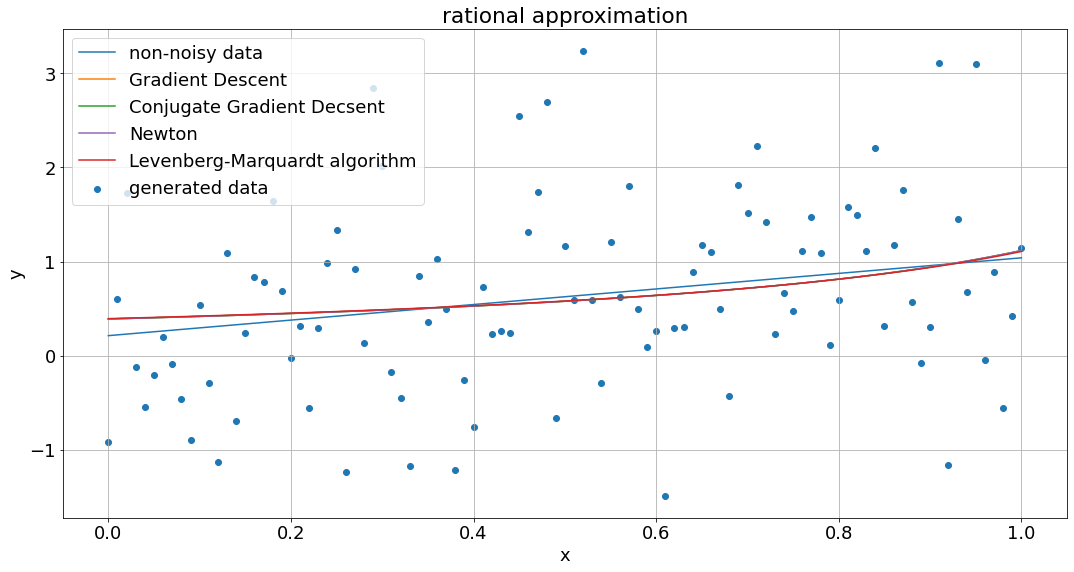

In [ ]:
#rational approximation

#functions for optimizations
def rational(x, a, b): #F(x_k, a, b)
    return a / (1 + b * x)

def least_squares2(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global rational
    return np.sum((rational(x_k, a, b) - y_k)**2)

def least_squares_lm2(params): #D(a, b)
    a, b = params
    global x_k, y_k
    global rational
    return (rational(x_k, a, b) - y_k)

initial_guess = [1, 1]

#Gradient Descent
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 150  # The number of iterations to perform gradient descent

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m / (1 + x_k * c) # The current predicted value of Y
    D_c = sum( -2*m*x_k*(m-y_k*(c*x_k+1)) / (c*x_k+1)**3)
    D_m = sum( - 2 *(c * x_k *y_k -m + y_k ) / (c*x_k + 1)**2)
    m = m - L * D_m
    c = c - L * D_c

#Conjugate Gradient Decsent
a1 = opt.minimize(least_squares2, initial_guess, method='CG', tol = 0.001)

#Newton's method
a2 = opt.minimize(least_squares2, initial_guess, method='BFGS', tol = 0.001)

#Levenberg-Marquardt algorithm
a3 = opt.least_squares(least_squares_lm2, [0.01, 0.01], method='lm', ftol = 0.001, xtol = 0.001)

print(m, c)
print(a1['x'])
print(a2['x'])
print(a3['x'])

#plotting the results
plt.figure(figsize=(18, 9))
plt.scatter(x_k, y_k, label='generated data')
plt.plot(x_k, alpha * x_k + beta, label='non-noisy data', color='tab:blue')
plt.plot(x_k, m / (1 + x_k * c), label='Gradient Descent', color='tab:orange')
plt.plot(x_k, a1['x'][0] / (1 + x_k * a1['x'][1]), label='Conjugate Gradient Decsent', color = 'tab:green')
plt.plot(x_k, a2['x'][0] / (1 + x_k * a2['x'][1]), label='Newton', color = 'tab:purple')
plt.plot(x_k, a3['x'][0] / (1 + x_k * a3['x'][1]), label='Levenberg-Marquardt algorithm', color = 'tab:red')
plt.title("rational approximation")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.savefig('4.png')
plt.show()
#files.download("4.png")